In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy import optimize

In [4]:
#Start with CDF calculation, needs gaussian first:
def gaussian(x, mean=5, width=2):
    return np.exp(-(x-mean)**2/(2*width**2))/(np.sqrt(2*np.pi)*width)

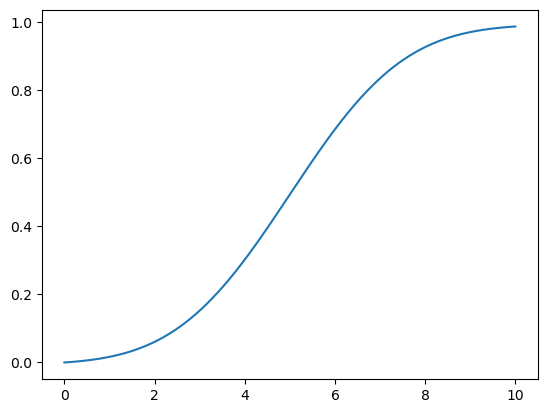

In [10]:
#get functional form of CDF
def CDF(PDF,x,xmin=0):
    CDF = integrate.quad(PDF,xmin,x)[0]
    return CDF, x

#allow it to be plotted
def CDF_range(CDF,PDF,xmin=0,xmax=10):
    x_range = np.linspace(xmin, xmax, 1000)
    CDF_range = []
    for i in range(1000):
        CDF_range.append(CDF(PDF,x_range[i],xmin)[0])
    
    return CDF_range, x_range

CDF_g, x_g = CDF_range(CDF,gaussian)
plt.plot(x_g,CDF_g)
plt.show()

In [19]:
#now we limit our range in y to min(CDF), max(CDF):
y = min(CDF_g)*np.ones(1000)+(max(CDF_g)-min(CDF_g))*np.random.rand(1000)

[]

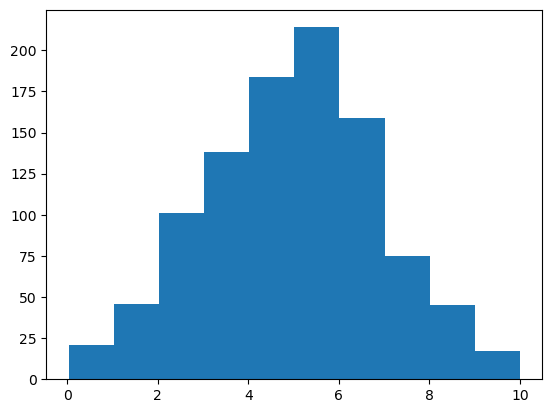

In [21]:
#and run each value through the inverted CDF to get x values:
x_vals = []
for i in range(1000):
    y_val = y[i]
    #we invert by finding the local min of (CDF(x) - y[i])**2 : this gives us back the x value for the corresponding y
    x_vals.append(optimize.minimize_scalar(lambda x: (CDF(gaussian,x)[0]-y[i])**2)["x"])

plt.hist(x_vals,bins=10)
plt.plot()

In [24]:
# exp(-x) distribution:

def inv_exp(x):
    return np.exp(-x)

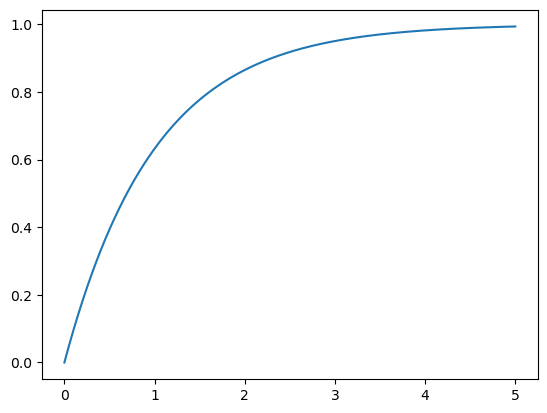

In [25]:
#plot CDF for completeness:
CDF_exp, x_exp = CDF_range(CDF,inv_exp,xmax=5)
plt.plot(x_exp,CDF_exp)
plt.show()

[]

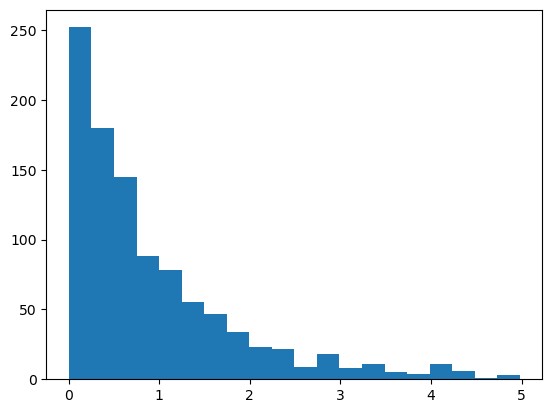

In [30]:
#exactly analogous process to above
#Limit our range in y to min(CDF), max(CDF):
y_exp = min(CDF_exp)*np.ones(1000)+(max(CDF_exp)-min(CDF_exp))*np.random.rand(1000)

#and run each value through the inverted CDF to get x values:
x_vals_exp = []
for i in range(1000):
    #we invert by finding the local min of (CDF(x) - y[i])**2 : this gives us back the x value for the corresponding y
    x_vals_exp.append(optimize.minimize_scalar(lambda x: (CDF(inv_exp,x)[0]-y_exp[i])**2)["x"])

plt.hist(x_vals_exp,bins=20)
plt.plot()

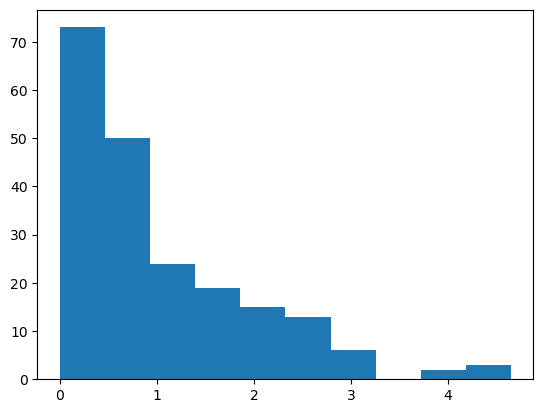

0.205 compared to 1


In [33]:
#Implement accept/reject method for same inverse exponential distribution:

points = np.linspace(0,5,1000)
kept = []
for i in range(len(points)):
        y_ar = inv_exp(points[i])
        #if a random number comes in below the associated function, we count it. If not, we don't.
        if np.random.rand() < y_ar:
            kept.append(points[i])
        else:
            continue

#efficiency is simple to calculate:
eff_ar = len(kept)/1000
                      
plt.hist(kept)
plt.show()
print(eff_ar,'compared to',1)